In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- 데이터 정규화

In [3]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

- 차원 축소

In [4]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca5 = PCA(n_components=5)
pca10 = PCA(n_components=10)

In [5]:
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca5 = pca5.fit_transform(cancer_std)
cancer_pca10 = pca10.fit_transform(cancer_std)

- 분류 정확도

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# 정규화된 오리지널 데이터
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2021
    )
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.993006993006993

In [8]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=2021
    )
    lrc = LogisticRegression(random_state=2021)
    lrc.fit(X_train, y_train)
    score = lrc.score(X_test, y_test)
    return np.round(score, 4)

In [9]:
print('PCA 2 정확도:', pca_accuracy(cancer_pca2, cancer.target))
print('PCA 5 정확도:', pca_accuracy(cancer_pca5, cancer.target))
print('PCA 10 정확도:', pca_accuracy(cancer_pca10, cancer.target))
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9441
PCA 5 정확도: 0.993
PCA 10 정확도: 0.986
원데이터 정확도: 0.993


-globals() : 전역 변수를 딕셔너리에 담아두기

In [10]:
for dim in [2,5,10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancer_pca2{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc =  pca_accuracy(globals()[f'cancer_pca2{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9441
PCA 5 정확도: 0.993
PCA 10 정확도: 0.986
원데이터 정확도: 0.993


In [11]:
cancer_pca_df = pd.DataFrame(data=cancer_pca2, columns=['PC1','PC2'])
cancer_pca_df['target'] = cancer.target

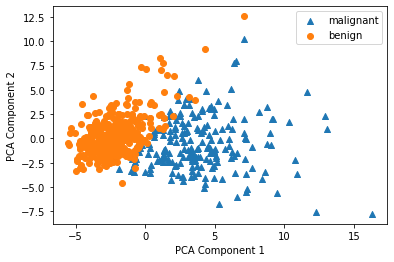

In [12]:
markers=['^', 'o']

# PC1 을 x축, PC2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = cancer_pca_df[cancer_pca_df['target']==i]['PC1']
    y_axis_data = cancer_pca_df[cancer_pca_df['target']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)
kmeans.fit(cancer_std)

KMeans(n_clusters=2, random_state=2021)

In [14]:
cancer_pca_df['cluster'] = kmeans.labels_
cancer_pca_df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,0
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,0
3,7.122953,10.275589,0,0
4,3.935302,-1.948072,0,0


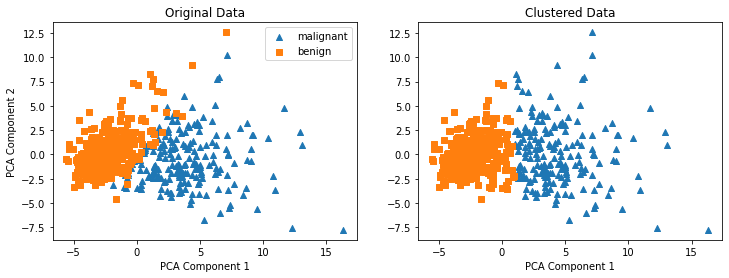

In [15]:
markers = ['^', 's']
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = cancer_pca_df[cancer_pca_df[column] == i]['PC1']
        y_axis_data = cancer_pca_df[cancer_pca_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                   label=cancer.target_names[i])

    if k==0:    # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:       # cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

In [16]:
df['cluster'] = kmeans.labels_
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0


In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(cancer_std, df.cluster)
df['실루엣 계수'] = score_samples
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,실루엣 계수
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0,0.296634
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0,0.041947
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0,0.341336


In [18]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.136913
1,0.450196


In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(cancer_std, df.cluster)
df['실루엣 계수'] = score_samples
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,실루엣 계수
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0,0.296634
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0,0.041947
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0,0.341336


In [20]:
df['실루엣 계수'].mean()

0.3433822406907782

In [21]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.136913
1,0.450196


In [22]:
silhouette_score(cancer_std, df.cluster)

0.3433822406907781

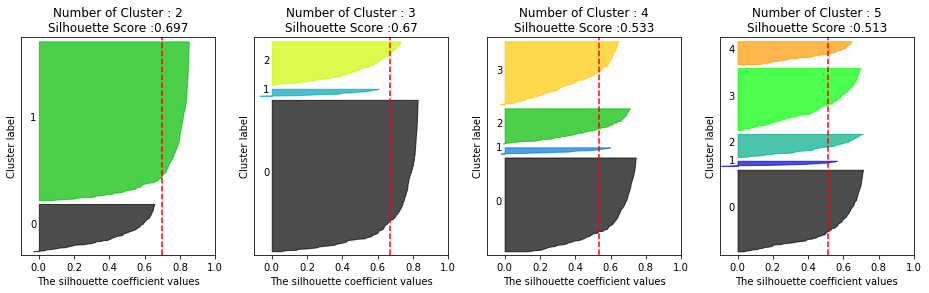

In [24]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], cancer.data)